## Final Project Submission

Please fill out:
* Student name: Cassidy Exum
* Student pace: self paced
* Scheduled project review date/time: Undetermined
* Instructor name: Morgan Jones
* Blog post URL: https://exumexaminesdata.blogspot.com/2022/08/creating-fantasy-sports-app-for-pll.html


# Determining the impact of different features on house price

We are going to use linear regression and other statistical tools to determine what features affect the sale price of a house, and create models that can predict the sale price after learning from those freatures.

### Stakeholder: Blackrock
Blackrock is an American investment managment company that has recently been buying up a ton of real estate. They have tasked us with helping them determine the key features of a houses sale price and generating models to predict prices for them.

# What questions are we going to solve?

# Create the best model for predicting the price of a home

Start with the most correlated feature. Then expand until our model is most accurate

We want Blackrock to be able to predict house prices and make smart offers when purchasing real estate

# 1: Imports and Data Cleaning

Lets start by importing the required packages and inspecting the data

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Next few blocks will be some data info
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
# 3 columns arent the same length as everything else
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Are these columns useful? What are they?
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `yr_renovated` - Year when house was renovated

In [7]:
# Check counts
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Waterfront is binary, so NA values we can assume are "NO"

In [8]:
# fill NAN values
data['waterfront'].fillna('NO', inplace=True)

In [9]:
# Check counts
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

We can also assume that NAN values in View would just be None

In [10]:
# fill NAN values
data['view'].fillna('NONE', inplace=True)

Last column that has issues, 'year renovated'

In [11]:
# Check counts
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Ok, good to note that 0.0 is a placeholder. It probably indicates that the house was never renovated and NAN values represent that we do not know if it was ever renovated. I don't want to fill NA with anything here, so we probably won't use this column. Lets just drop it.

In [12]:
# drop yr_renovated
data.drop('yr_renovated', axis=1, inplace=True)

Lets check the data again and ensure everything worked

In [13]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Perfect. The last column that i was to check right at the beginning is the price column, as that is our target and we can't have any weird placeholder values

In [14]:
#check counts
data['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

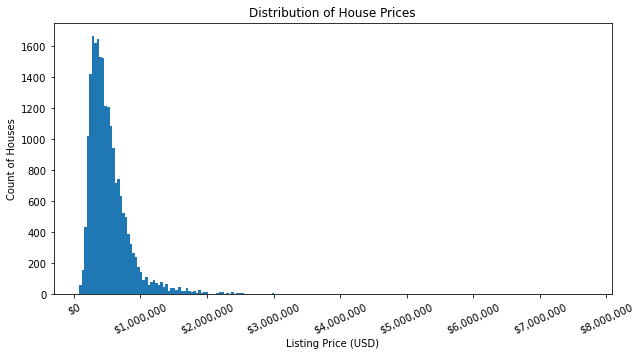

In [15]:
# Create a graph of sale price

import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['price'], bins=200)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices");

fmt = '${x:,.0f}'
plt.ticklabel_format(style='plain')
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show();

Looks good. Now to solve our questions

# 2: Starting the modeling

Lets set up a train test split for our data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

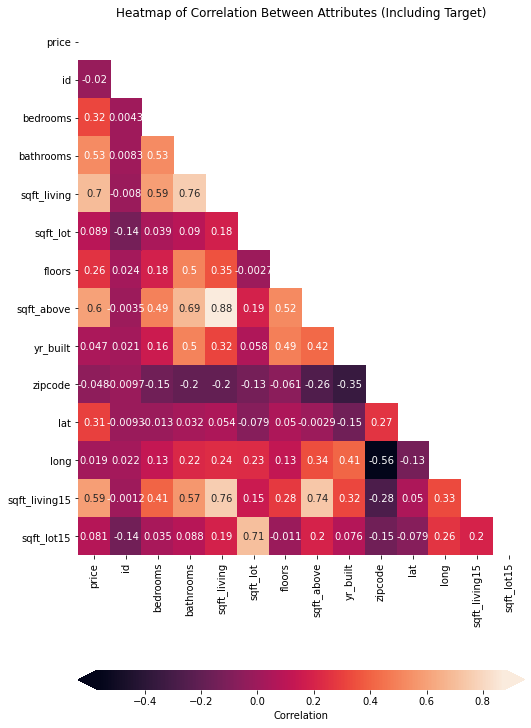

In [18]:
#Create a correlation heatmap

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 14))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .15, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the heatmap. It looks like Bedrooms, Bathrooms, sqft_living, sqft_above, and sqft_living15 are the best predictors. If we wanted to make a full model that uses all of these to predict, it would be the most robust model.

The first model we will create is just a model using Bedroom and Bathrooms because based on user feedback and interaction, those a common features that people sort by

In [19]:
most_correlated_feature = 'sqft_living'

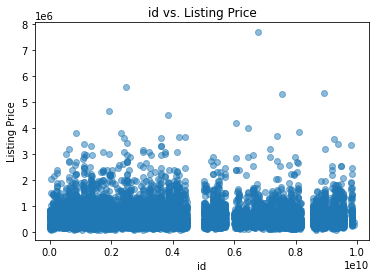

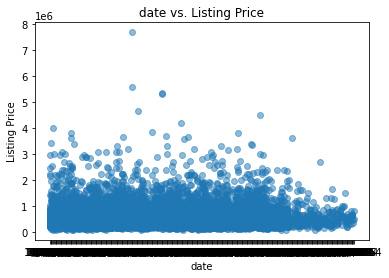

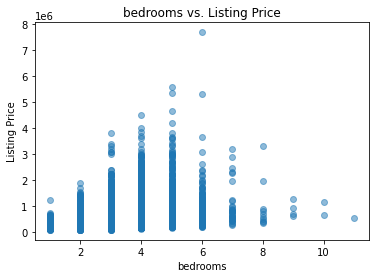

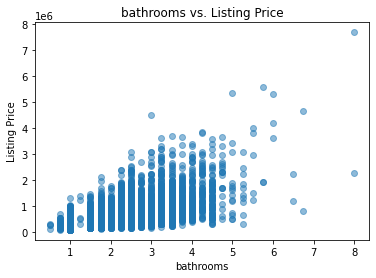

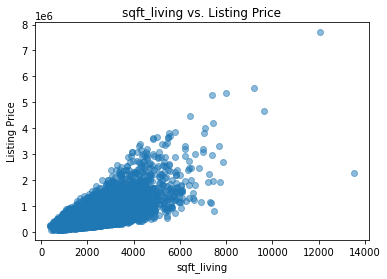

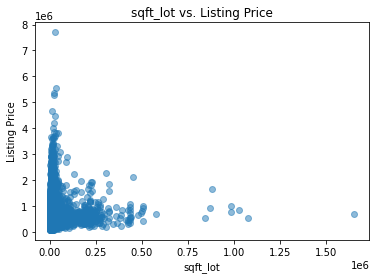

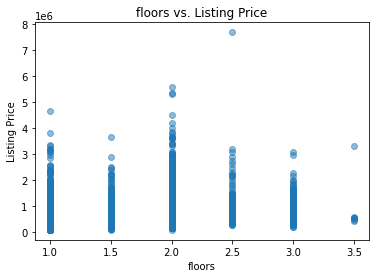

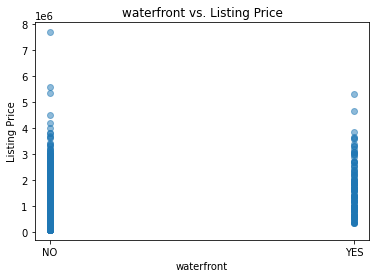

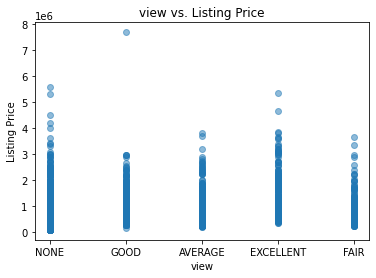

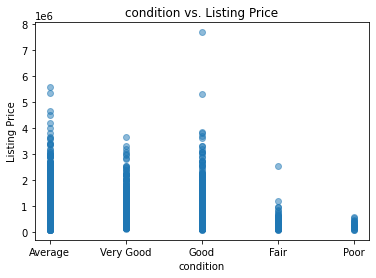

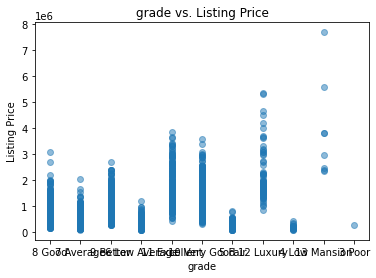

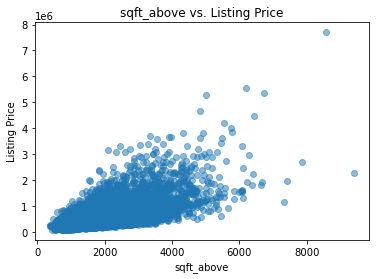

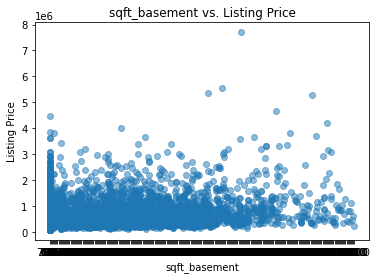

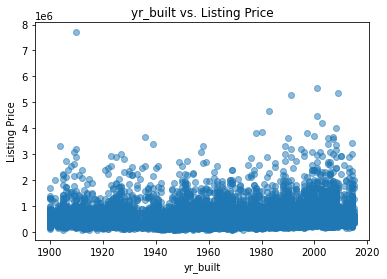

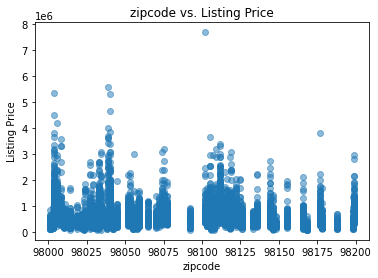

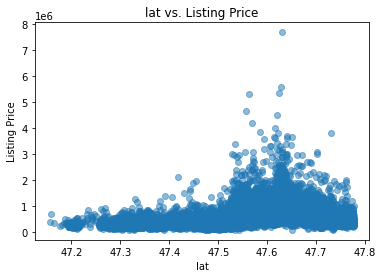

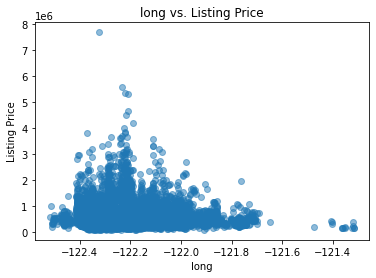

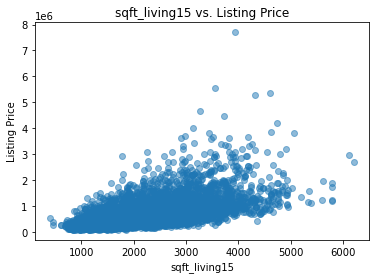

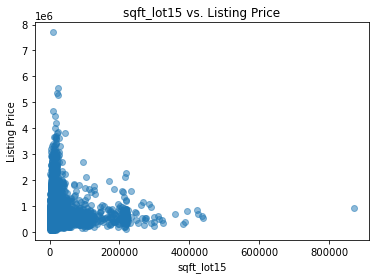

In [20]:
#Create graphs for all features vs price

for col in list(X_train.columns):
    fig, ax = plt.subplots()

    ax.scatter(X_train[col], y_train, alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel("Listing Price")
    ax.set_title("{} vs. Listing Price".format(col));

Bathrooms, sqft_living, sqft_above, and sqft_living15 are the most linear.

We are going to ignore sqft_living15 because it may overlap too much with sqft_living.

To start, the baseline model will use sqft_living because it is the most correlated feature, then we will start adding others to try and make the model more precise.

In [21]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [22]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


Ok, the model is accurate only 50% of the time. We will deffinitly need to increase that.

In [23]:
#build a model with all numeric features

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

X_train_numeric

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
6405,3905080280,3,2.50,1880,4499,2.0,1880,1993,98029,47.5664,-121.999,2130,5114
937,5466420030,3,2.50,2020,6564,1.0,1310,1994,98042,47.3545,-122.158,1710,5151
19076,2623069010,5,4.00,4720,493534,2.0,3960,1975,98027,47.4536,-122.009,2160,219542
15201,4443800545,2,2.00,1430,3880,1.0,1430,1949,98117,47.6844,-122.392,1430,3880
13083,9485930120,3,2.25,2270,32112,1.0,1740,1980,98042,47.3451,-122.094,2310,41606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,3,2.50,2230,5800,2.0,2230,2004,98065,47.5308,-121.847,2230,6088
21575,4140940150,4,2.75,2770,3852,2.0,2770,2014,98178,47.5001,-122.232,1810,5641
5390,8658300480,4,1.50,1530,9000,1.0,1530,1976,98014,47.6492,-121.908,1520,8500
860,1723049033,1,0.75,380,15000,1.0,380,1963,98168,47.4810,-122.323,1170,15000


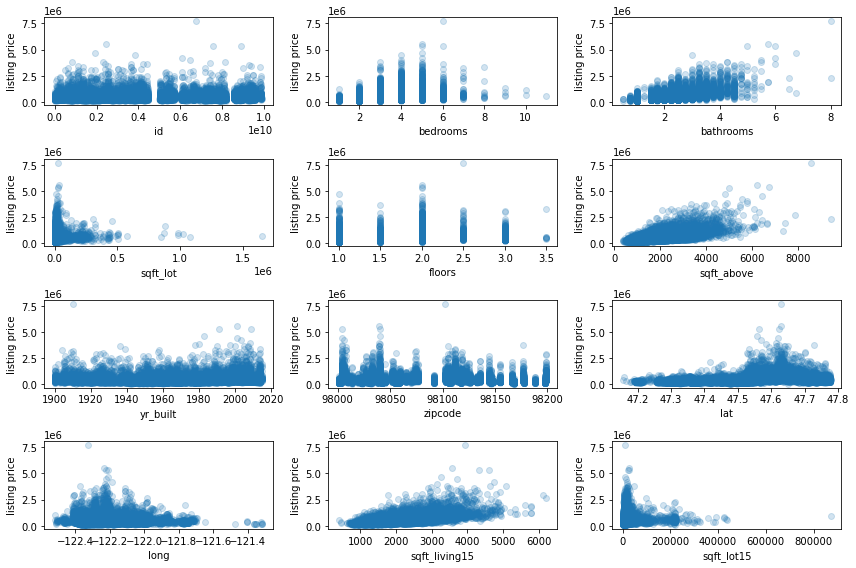

In [24]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [25]:
to_drop = ['id', 'lat', 'long', 'yr_built', 'zipcode']

In [26]:
X_train_second_model = X_train_numeric.drop(to_drop, axis=1)

X_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
6405,3,2.50,1880,4499,2.0,1880,2130,5114
937,3,2.50,2020,6564,1.0,1310,1710,5151
19076,5,4.00,4720,493534,2.0,3960,2160,219542
15201,2,2.00,1430,3880,1.0,1430,1430,3880
13083,3,2.25,2270,32112,1.0,1740,2310,41606
...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,2230,2230,6088
21575,4,2.75,2770,3852,2.0,2770,1810,5641
5390,4,1.50,1530,9000,1.0,1530,1520,8500
860,1,0.75,380,15000,1.0,380,1170,15000


In [27]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5191877399496249
Validation score: 0.5217455628553768

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


Ok, very slightly better.

In [28]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2192.
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:19:25   Log-Likelihood:            -2.2454e+05
No. Observations:               16197   AIC:                         4.491e+05
Df Residuals:                   16188   BIC:                         4.492e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9680.3721      1e+04      0.964      0.335   -9999.823    2.94e+04
bedrooms      -6.128e+04   2805.588    -21.843      0.000   -6.68e+04   -5.58e+04
bathrooms      2751.5969   4434.024      0.621      0.535   -5939.581    1.14e+04
sqft_living     316.0667      5.960     53.031      0.000     304.384     327.749
sqft_lot          0.0314      0.070      0.450      0.653      -0.105       0.168
floors         2.132e+04   4965.823      4.292      0.000    1.16e+04     3.1e+04
sqft_above      -60.9236      5.957    -10.228      0.000     -72.600     -49.248
sqft_living15    82.1147      4.646     17.673      0.000      73.007      91.222
sqft_lot15       -0.9878      0.107     -9.252      0.000      -1.197      -0.779
==============================================================================
Omnibus:                    10555.124   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320391.752
Skew:                           2.674   Prob(JB):                         0.00
Kurtosis:                      24.122   Cond. No.                     2.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
significant_features = ['bedrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_lot15']

In [30]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5100669646895467
Validation score: 0.5119175964433708

Second Model
Train score:      0.5191877399496249
Validation score: 0.5217455628553768

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


Not any better...

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: False
sqft_living: True
sqft_lot: False
floors: True
sqft_above: True
sqft_living15: True
sqft_lot15: True


Lets create a model using what the feature selection tells us is best

In [32]:
fs_chosen_features = ['bedrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15']

In [33]:
fourth_model = LinearRegression()
X_train_fourth_model = X_train[fs_chosen_features]

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_fourth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current (Fourth) Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current (Fourth) Model
Train score:      0.5191497278812175
Validation score: 0.5218413024647856

Third Model
Train score:      0.5100669646895467
Validation score: 0.5119175964433708

Second Model
Train score:      0.5191877399496249
Validation score: 0.5217455628553768

Baseline Model
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [34]:
X_test_final = X_test[fs_chosen_features]

In [35]:
# Fit the model on X_train_final and y_train
fourth_model.fit(X_train_fourth_model, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
fourth_model.score(X_test_final, y_test)

0.5129169509240461

In [36]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, fourth_model.predict(X_test_final), squared=False)

258510.45108938302

Our model is off by $258,510 on average.

In [37]:
print(pd.Series(fourth_model.coef_, index=X_train_fourth_model.columns, name="Coefficients"))
print()
print("Intercept:", fourth_model.intercept_)

bedrooms        -61025.955997
sqft_living        317.789480
floors           22459.254028
sqft_above         -61.252188
sqft_living15       82.067164
sqft_lot15          -0.956138
Name: Coefficients, dtype: float64

Intercept: 10090.785789977293


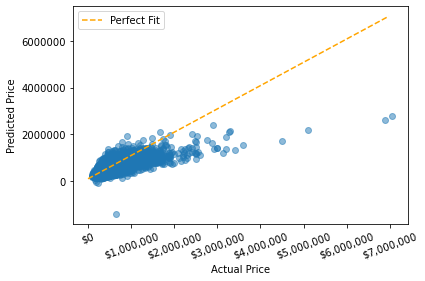

In [38]:
preds = fourth_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
fmt = '${x:,.0f}'
plt.ticklabel_format(style='plain')
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks(rotation = 20)
ax.legend();

# Testing eliminating outliars (Houses > $2,500,000)

In [39]:
df_clean = data.loc[data['price']<2500000]

In [40]:
df_clean['price'].describe()

count    2.149500e+04
mean     5.274094e+05
std      3.101881e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      2.490000e+06
Name: price, dtype: float64

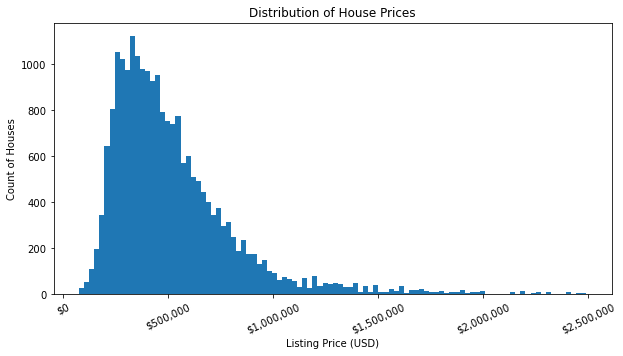

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df_clean['price'], bins=100)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices");

fmt = '${x:,.0f}'
plt.ticklabel_format(style='plain')
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show();

In [42]:
X = df_clean.drop(['price'], axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
X_train = X_train.select_dtypes(include=['float64', 'int64'])

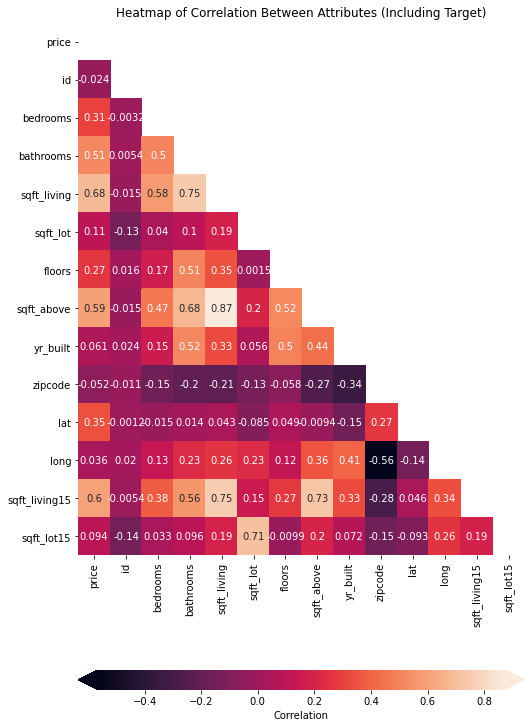

In [44]:
#Create a correlation heatmap

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 14))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .15, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [45]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
id: False
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
sqft_above: True
yr_built: True
zipcode: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True


In [46]:
# Best features from the 
selected_feats = ['bedrooms',
                  'bathrooms', 
                  'sqft_living',
                  'sqft_lot',
                  'floors',
                  'sqft_above',
                  'yr_built',
                  'zipcode',
                  'lat',
                  'long',
                  'sqft_living15', 
                  'sqft_lot15']

In [47]:
X_train_final = X_train[selected_feats]
X_test_final = X_test[selected_feats]

In [48]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
final_model.score(X_test_final, y_test)

0.6475058521096715

Finally! We have a model scoring over 64%! We could probably get even better if we cut the data down even further. Say, only houses between $0 and $1,000,000.

In [49]:
mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

185092.05699715347

An error of $185,000 is much much better than what we previously had.

In [50]:
df_clean_2 = data.loc[data['price']<1000000]

In [51]:
X = df_clean_2.drop(['price'], axis=1)
y = df_clean_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = X_train.select_dtypes(include=['float64', 'int64'])

In [52]:
X_train = X_train[selected_feats]
X_test = X_test[selected_feats]

In [53]:
max_one_mill_model = LinearRegression()

# Fit the model on X_train_final and y_train
max_one_mill_model.fit(X_train, y_train)

# Score the model on X_test_final and y_test
max_one_mill_model.score(X_test, y_test)

0.6238858115796715

Why did it not get better? Am I using worse predictors for this model?

In [54]:
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
sqft_above: True
yr_built: True
zipcode: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True


Weird. I don't know why this is worse than the previous model.

All in all, I'm happy with obtaining a model that can accuratly predict near 64%

# Conclusion
# Final Model Discussion

The best model and the one we will present to Blackrock had a score of 64.5% and a mean squares error of $185,000. We could've got to this model faster if we immedietly eliminated outliars, but we chose to leave them in hoping they would provide the model accuracy at higher price values. Instead, these values only muddied the predictions on the bulk of the data. Once the outliars were eliminated, the new model was able to increase its score from 52 to 64.5 percent.

The final model used all of the numeric features in the dataFrame. The heatmap we generated showed that even the best 3 features were only had around .60 - .70 correlation, but all of the features ended up being useful. We used a selecter library to choose the features for this model.